# Compare full energies with the linear wave action

Saved a version of `diag_vel.out` where ke and ie are overwritten with the u-term and s-term in the action as `BLAH`,
and a version where the ke is actually the ke and the ie is actually the ie as `BLAH`. 

The simulations themselves should be identical.

Lets make some comparisons

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## KE and the 'u-term'
First, note that the kinetic energy `ke` was calculated from integrating the full density multiplied by the full velocity squared (and is missing the factor of 1/2),
and that the uterm is calculated from integrating the analytic density multiplied by the full velocity squared (is also missing the factor of 1/2).

So they should be very similar - check this!

In [2]:
# load both, here only need t, ke, uterm, ie, sterm
t, maxU, maxMach, ke, ge, ie, dt = np.loadtxt("../oldruns/jul31/diag_vel.out", skiprows=1, unpack=True)
t, maxU, maxMach, uterm, ge, sterm, dt = np.loadtxt("../oldruns/jul31/diag_velACTION.out", skiprows=1, unpack=True)

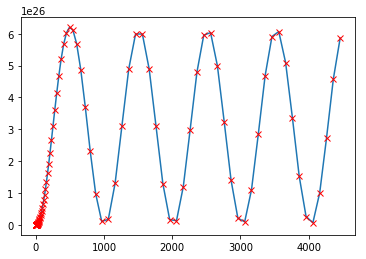

In [3]:
# plot full kinetic energy ke and the uterm on the same axis.
# ke - blue solid, u term, red x's 
plt.plot(t,ke, t, uterm,'rx') ## Looks good!

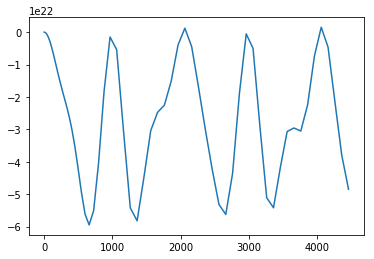

In [4]:
# Plot their difference - seems small enough
plt.plot(t,ke - uterm)

In [5]:
# Plot a normalisation of their difference
#plt.plot(t,(ke - uterm) / ke)

## The behaviour of the linear wave action

This should be a conserved quantity, so lets look at the uterm versus the sterm change

In [6]:
# load the action dataset 
t, maxU, maxMach, uterm, ge, sterm, dt = np.loadtxt("../oldruns/jul31/diag_velACTION.out", skiprows=1, unpack=True)

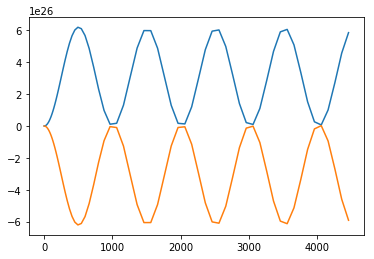

In [7]:
# plot uterm (blue) versus dsterm (orange) - Looks good
plt.plot(t,uterm,t,sterm-sterm[0]) 

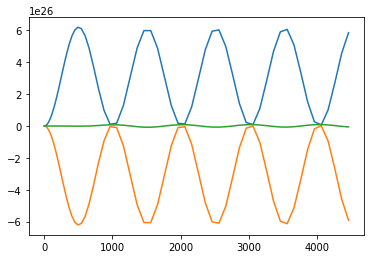

In [8]:
# Do they sum to zero? Plot on same axis shows not quite, but almost
plt.plot(t,uterm,t,sterm-sterm[0],t,uterm + (sterm-sterm[0]))

6.250000000000026e+26 8.887121705281538e+24 -7.585370421903154e+24


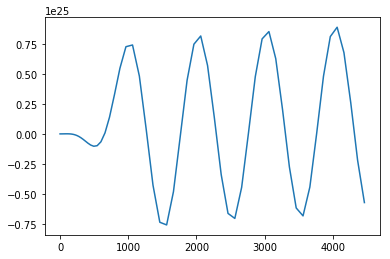

In [9]:
#Look at the total nonconservation of action on its own scale
totAction = uterm + sterm
dAction = totAction - totAction[0]
print(totAction[0], max(dAction), min(dAction))
plt.plot(t,totAction-totAction[0])

## The behaviour of the total energy

In [10]:
# load the total energy dataset
t, maxU, maxMach, ke, ge, ie, dt = np.loadtxt("../oldruns/jul31/diag_vel.out", skiprows=1, unpack=True)

In [11]:
# First need some post processing
# - ke is missing factor of 1/2, but should explicitly account for it since gpe isn't missing such a factor (I think?)
# - gpe hasn't been integrated over the domain width, so needs to be multiplied by 1e9 in this simulation

ke = ke/2
ge = ge*1e9

tot = ke + ge + ie
dTot = tot - tot[0]

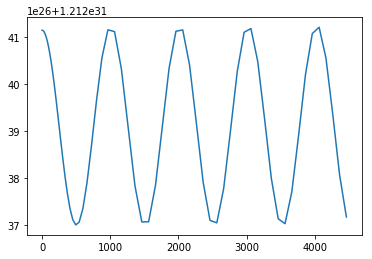

In [12]:
# Plot the total energy
plt.plot(t,tot)

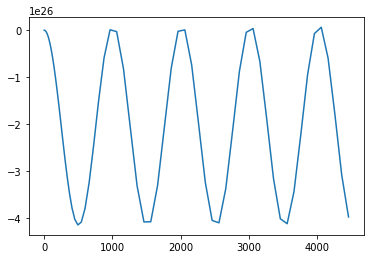

In [13]:
# Plot the delta of the total energy
plt.plot(t,dTot)

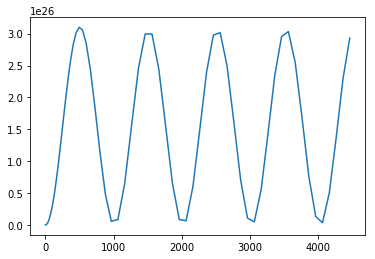

In [14]:
# Plot the ke
plt.plot(t,ke)

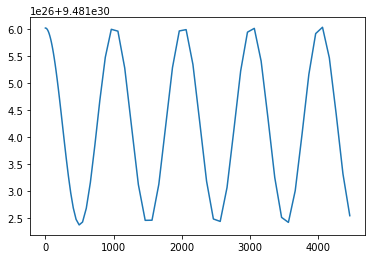

In [15]:
# Plot the ie
plt.plot(t,ie)

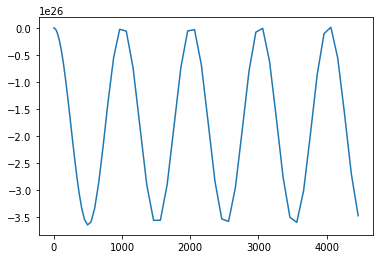

In [16]:
# Plot the dIe
dIe = ie - ie[0]
plt.plot(t,dIe)

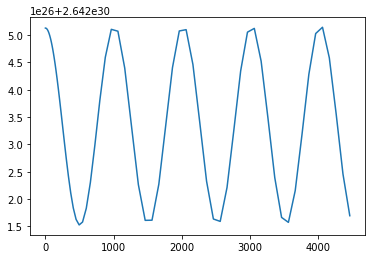

In [17]:
# Plot the gpe
plt.plot(t,ge)

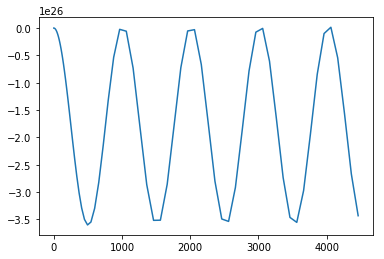

In [18]:
# Plot the delta of gpe
dGe = ge-ge[0]
plt.plot(t,dGe)

In [19]:
# So can see that gpe and ie changes are antiphase with ke (good)
# do they match up?

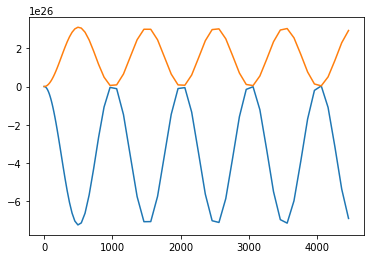

In [20]:
# plot dGE+dIE vs ke 
plt.plot(t,dGe+dIe,t,ke)

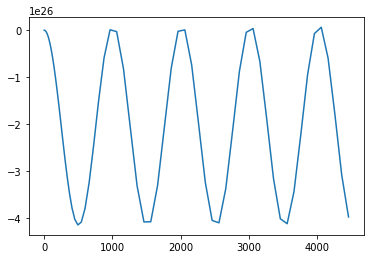

In [21]:
# plot dGE+dIE + ke 
plt.plot(t,dGe+dIe + ke)

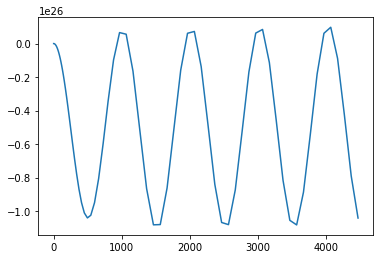

In [22]:
# plot dGE+dIE + 2*ke - maybe you do have a mistake with factors!?
plt.plot(t,dGe+dIe + 2*ke)